El objetivo de este Análisis Exploratorio de Datos (EDA) es entender el comportamiento de los taxis verdes y amarillos en la Ciudad de Nueva York, específicamente en términos de duracion de recorridos por milla mensualmente y ingresos generados en diferentes zonas. <br>

Utilizamos un conjunto de datos que contiene información detallada sobre cada viaje, incluyendo la ubicación y el monto total gastado.<br>

A eso sumemole todos los importes que por lado del cliente debe pagar y que ya van incluido en la tarifa del viaje:

- Más $0.50 de MTA State Surcharge.
-Más $0.30 de Improvement Surcharge.
- Si la carrera es de 16h a 20h en días laborables (sin incluir festivos), un recargo de $4.50.
- Más un recargo del New York State Congestion de $2.50 por un taxi amarillo o $2.75 por el taxi verde, para todos aquellos trayectos que acaben o pasen por la zona sur de la isla de Manhattan hasta la calle 96.
- El pasajero además también debe abonar los peajes y la propina mínima del 15%.

[Tarifa Oficial de Taxis de NY.](https://www.nyc.gov/site/tlc/passengers/taxi-fare.page/).


En mi análisis, me enfoco en las zonas de Nueva York y calculo los ingresos totales generados en cada una de ellas tanto para los taxis verdes como para los amarillos. Visualizo estos datos utilizando gráficos de barras, lo que nos permite comparar fácilmente los ingresos entre las diferentes zonas y entre los dos tipos de taxis.<br>

Esperamos que este análisis nos ayude a identificar patrones y tendencias que podrían informar decisiones estratégicas para mejorar la eficiencia y rentabilidad de los servicios de taxi en Nueva York.


In [1]:
# importo las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Lectura del primer dataframe 'yellow_tripdata_2023-09.parquet'.
# Y visualizacion de las primeras 15 filas.
df= pd.read_parquet('../parquet/yellow_tripdata_2023-09.parquet')
df.head(15)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-09-01 00:15:37,2023-09-01 00:20:21,1.0,0.80,1.0,N,163,230,2,6.5,3.5,0.5,0.00,0.00,1.0,11.50,2.5,0.00
1,2,2023-09-01 00:18:40,2023-09-01 00:30:28,2.0,2.34,1.0,N,236,233,1,14.2,1.0,0.5,2.00,0.00,1.0,21.20,2.5,0.00
2,2,2023-09-01 00:35:01,2023-09-01 00:39:04,1.0,1.62,1.0,N,162,236,1,8.6,1.0,0.5,2.00,0.00,1.0,15.60,2.5,0.00
3,2,2023-09-01 00:45:45,2023-09-01 00:47:37,1.0,0.74,1.0,N,141,229,1,5.1,1.0,0.5,1.00,0.00,1.0,11.10,2.5,0.00
4,2,2023-09-01 00:01:23,2023-09-01 00:38:05,1.0,9.85,1.0,N,138,230,1,45.0,6.0,0.5,17.02,0.00,1.0,73.77,2.5,1.75
5,2,2023-09-01 00:05:20,2023-09-01 00:46:57,3.0,12.83,1.0,N,93,75,2,55.5,1.0,0.5,0.00,6.94,1.0,67.44,2.5,0.00
6,1,2023-09-01 00:51:50,2023-09-01 01:10:21,0.0,10.90,1.0,N,93,255,1,41.5,1.0,0.5,3.00,0.00,1.0,47.00,0.0,0.00
7,1,2023-09-01 00:01:04,2023-09-01 00:18:36,1.0,3.90,1.0,N,140,7,1,20.5,3.5,0.5,6.35,0.00,1.0,31.85,2.5,0.00
8,2,2023-09-01 00:37:44,2023-09-01 00:52:24,2.0,2.70,1.0,N,45,164,1,16.3,1.0,0.5,4.26,0.00,1.0,25.56,2.5,0.00
9,2,2023-09-01 00:02:13,2023-09-01 00:07:12,1.0,1.02,1.0,N,238,236,1,7.9,1.0,0.5,2.58,0.00,1.0,15.48,2.5,0.00


In [4]:
# Hago esta funcion para contar los datos faltantes en cada columna.
def contar_datos_faltantes(df):
    # Contar el número de datos faltantes en cada columna
    datos_faltantes = df.isnull().sum()
    return datos_faltantes

contar_datos_faltantes(df)

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140225
trip_distance                 0
RatecodeID               140225
store_and_fwd_flag       140225
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     140225
Airport_fee              140225
dtype: int64

In [5]:
df.info() # Muestra el tipo de dato de cada columna.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2846722 entries, 0 to 2846721
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

* En esta funcion ademas de calcular la duracion de un viaje por velocidad creo una nueva Columna llamada 'Duracion' que es por minutos.

In [6]:
# Hago esta funcion para calcular la duracion del viaje.
def calcular_duracion(df, tpep_pickup_datetime, tpep_dropoff_datetime):
    
    # Uso la funcion to_datetime para convertir las columnas en formato fecha.
    df[tpep_pickup_datetime] = pd.to_datetime(df[tpep_pickup_datetime])
    df[tpep_dropoff_datetime] = pd.to_datetime(df[tpep_dropoff_datetime])
    
    # Calcular la duración
    df['Duracion'] = df[tpep_dropoff_datetime] - df[tpep_pickup_datetime]
    
    return df

calcular_duracion(df, 'tpep_pickup_datetime', 'tpep_dropoff_datetime')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,Duracion
0,1,2023-09-01 00:15:37,2023-09-01 00:20:21,1.0,0.80,1.0,N,163,230,2,6.50,3.5,0.5,0.00,0.0,1.0,11.50,2.5,0.00,0 days 00:04:44
1,2,2023-09-01 00:18:40,2023-09-01 00:30:28,2.0,2.34,1.0,N,236,233,1,14.20,1.0,0.5,2.00,0.0,1.0,21.20,2.5,0.00,0 days 00:11:48
2,2,2023-09-01 00:35:01,2023-09-01 00:39:04,1.0,1.62,1.0,N,162,236,1,8.60,1.0,0.5,2.00,0.0,1.0,15.60,2.5,0.00,0 days 00:04:03
3,2,2023-09-01 00:45:45,2023-09-01 00:47:37,1.0,0.74,1.0,N,141,229,1,5.10,1.0,0.5,1.00,0.0,1.0,11.10,2.5,0.00,0 days 00:01:52
4,2,2023-09-01 00:01:23,2023-09-01 00:38:05,1.0,9.85,1.0,N,138,230,1,45.00,6.0,0.5,17.02,0.0,1.0,73.77,2.5,1.75,0 days 00:36:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846717,2,2023-09-30 23:31:12,2023-09-30 23:48:29,NaN,2.43,NaN,None,125,107,0,17.69,0.0,0.5,4.34,0.0,1.0,26.03,NaN,NaN,0 days 00:17:17
2846718,1,2023-09-30 23:42:18,2023-09-30 23:47:45,NaN,0.00,NaN,None,236,75,0,11.33,0.0,0.5,0.00,0.0,1.0,15.33,NaN,NaN,0 days 00:05:27
2846719,1,2023-09-30 23:03:35,2023-09-30 23:14:50,NaN,1.80,NaN,None,211,90,0,12.10,1.0,0.5,2.57,0.0,1.0,19.67,NaN,NaN,0 days 00:11:15
2846720,2,2023-09-30 23:57:05,2023-10-01 00:17:36,NaN,3.39,NaN,None,209,97,0,20.33,0.0,0.5,4.87,0.0,1.0,29.20,NaN,NaN,0 days 00:20:31


El código proporcionado registra la duración en minutos del trayecto en un taxi de color amarillo, desde el punto de inicio hasta la conclusión del recorrido.

In [7]:
# Seleccionar solo las columnas 'tpep_pickup_datetime', 'tpep_dropoff_datetime' y 'Duracion'
df_seleccionado = df[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'Duracion']]

df_seleccionado.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,Duracion
0,2023-09-01 00:15:37,2023-09-01 00:20:21,0 days 00:04:44
1,2023-09-01 00:18:40,2023-09-01 00:30:28,0 days 00:11:48
2,2023-09-01 00:35:01,2023-09-01 00:39:04,0 days 00:04:03
3,2023-09-01 00:45:45,2023-09-01 00:47:37,0 days 00:01:52
4,2023-09-01 00:01:23,2023-09-01 00:38:05,0 days 00:36:42


* Sección de Funciones para Calcular las Distancias de Vehículos con Combustible por Pasajero.<br>

Los taxis amarillos en Nueva York están autorizados para recoger más de un pasajero en un solo viaje, la tabla impresa nos muestra cuanto tardo el viaje y cuanto genero de ingresos.

In [8]:
def calcular_tiempo_por_distancia(df):
    
    df['Duracion'] = df['Duracion'].dt.total_seconds() / 60

    # Calcular la distancia recorrida por minuto
    df['Distancia_por_Minuto'] = df['trip_distance'] / df['Duracion']
    
    return df

df = calcular_tiempo_por_distancia(df)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,Duracion,Distancia_por_Minuto
0,1,2023-09-01 00:15:37,2023-09-01 00:20:21,1.0,0.80,1.0,N,163,230,2,...,3.5,0.5,0.00,0.0,1.0,11.50,2.5,0.00,4.733333,0.169014
1,2,2023-09-01 00:18:40,2023-09-01 00:30:28,2.0,2.34,1.0,N,236,233,1,...,1.0,0.5,2.00,0.0,1.0,21.20,2.5,0.00,11.800000,0.198305
2,2,2023-09-01 00:35:01,2023-09-01 00:39:04,1.0,1.62,1.0,N,162,236,1,...,1.0,0.5,2.00,0.0,1.0,15.60,2.5,0.00,4.050000,0.400000
3,2,2023-09-01 00:45:45,2023-09-01 00:47:37,1.0,0.74,1.0,N,141,229,1,...,1.0,0.5,1.00,0.0,1.0,11.10,2.5,0.00,1.866667,0.396429
4,2,2023-09-01 00:01:23,2023-09-01 00:38:05,1.0,9.85,1.0,N,138,230,1,...,6.0,0.5,17.02,0.0,1.0,73.77,2.5,1.75,36.700000,0.268392


En el análisis de este código, se destaca que la distancia mínima registrada es de 2.17 millas, con una duración de 14.28 minutos. Al calcular la relación entre la distancia y la duración, se obtiene un promedio de 0.001520 minutos por cada milla.

Por otro lado, se observa que la distancia máxima alcanzada es de  29.70 millas, con una duración de 62.86 minutos. En este caso, la tasa de distancia por cada minuto se estima en 0.47 millas.

In [9]:
def filtrar_viajes_largos_y_calcular_relacion(df):
    # Filtrar los viajes que duraron más de una hora
    df_viajes_largos = df[df['Duracion'] > 60]

    # Calcular la relación de distancia y tiempo
    df_viajes_largos.loc[:,'Distancia_por_Minuto'] = df_viajes_largos['trip_distance'] / df_viajes_largos['Duracion']
    
    return df_viajes_largos

df_viajes_largos = filtrar_viajes_largos_y_calcular_relacion(df[['trip_distance', 'Duracion', 'Distancia_por_Minuto']])
df_viajes_largos.head()

,trip_distance,Duracion,Distancia_por_Minuto
714,25.71,67.433333,0.381265
1063,14.02,71.150000,0.197048
2239,29.70,62.866667,0.472428
2841,2.17,1427.766667,0.001520
3116,17.63,94.033333,0.187487


En esta otra funcion de viajes medios de taxis amarillos se destaca que la distancia mínima registrada es de 6.70 millas, con una duración de 30.40 minutos. Al calcular la relación entre la distancia y la duración, se obtiene un promedio de 0.22 minutos por cada milla.

Por otro lado, se observa que la distancia máxima alcanzada es de 24.81 millas, con una duración de 44.26 minutos. En este caso, la tasa de distancia por cada minuto se estima en 0.56 millas.

In [10]:
def filtrar_viajes_medios_y_calcular_relacion(df):
    # Filtrar los viajes que duraron más de una hora
    df_viajes_medios = df[df['Duracion'] >= 30]

    # Calcular la relación de distancia y tiempo
    df_viajes_medios.loc[:,'Distancia_por_Minuto'] = df_viajes_medios['trip_distance'] / df_viajes_medios['Duracion']
    
    return df_viajes_medios

df_viajes_medios = filtrar_viajes_medios_y_calcular_relacion(df[['trip_distance', 'Duracion', 'Distancia_por_Minuto']])
df_viajes_medios.head()

,trip_distance,Duracion,Distancia_por_Minuto
4,9.85,36.700000,0.268392
5,12.83,41.616667,0.308290
15,12.20,44.866667,0.271917
42,6.70,30.400000,0.220395
43,24.81,44.266667,0.560467


En esta otra funcion de viajes cortos de taxis amarillos, la distancia mínima registrada es de 0.74 millas, con una duración de 1.86 minutos. Al calcular la relación entre la distancia y la duración, se obtiene un promedio de 0.39 minutos por cada milla.

Por otro lado, se observa que la distancia máxima alcanzada es de 1.62 millas, con una duración de 4.05 minutos. y la  distancia por cada minuto se estima en 0.40 millas.

In [11]:
def filtrar_viajes_cortos_y_calcular_relacion(df):
    # Filtrar los viajes que duraron más de una hora
    df_viajes_cortos = df[df['Duracion'] <= 10]

    # Calcular la relación de distancia y tiempo
    df_viajes_cortos.loc[:,'Distancia_por_Minuto'] = df_viajes_cortos['trip_distance'] / df_viajes_cortos['Duracion']
    
    return df_viajes_cortos

df_viajes_cortos = filtrar_viajes_cortos_y_calcular_relacion(df[['trip_distance', 'Duracion', 'Distancia_por_Minuto']])
df_viajes_cortos.head()

,trip_distance,Duracion,Distancia_por_Minuto
0,0.80,4.733333,0.169014
2,1.62,4.050000,0.400000
3,0.74,1.866667,0.396429
9,1.02,4.983333,0.204682
11,1.37,7.433333,0.184305


_________________________________________________________________________________________________________


En esta sección, he calculado la métrica correspondiente para determinar la distancia total recorrida por un taxi durante el transcurso de un mes.<br>

Creación de la Columna ‘Parte_del_Día’
Este código crea una columna ‘parte_del_dia’, que contiene la parte del día correspondiente a cada hora. La operación (horas+4)%24 es para que la noche comience a las 20:00 y termine a las 4:00 de la mañana.<br>

La función pd.cut() se utiliza para dividir las horas en los intervalos definidos por bins.

In [12]:
# Lectura del segundo dataframe 'fhvhv_tripdata_2023-09.parquet'.
df2=pd.read_parquet('../parquet/fhvhv_tripdata_2023-09.parquet')
df2.head(15) # Visualizacion de las primeras 15 filas.

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2023-09-01 00:00:13,2023-09-01 00:02:47,2023-09-01 00:02:56,2023-09-01 00:14:08,7,226,2.350,...,1.03,0.00,0.0,0.00,9.41,N,N,,N,N
1,HV0003,B03404,B03404,2023-09-01 00:27:24,2023-09-01 00:29:32,2023-09-01 00:29:44,2023-09-01 00:59:58,144,36,6.790,...,2.64,2.75,0.0,7.18,25.97,N,N,,N,N
2,HV0003,B03404,B03404,2023-09-01 00:25:14,2023-09-01 00:27:15,2023-09-01 00:28:01,2023-09-01 00:35:53,186,125,1.610,...,0.97,2.75,0.0,0.00,8.34,N,N,,N,N
3,HV0003,B03404,B03404,2023-09-01 00:31:44,2023-09-01 00:36:51,2023-09-01 00:36:51,2023-09-01 00:46:48,125,148,1.370,...,0.85,0.75,0.0,0.00,7.44,Y,N,,N,N
4,HV0003,B03404,B03404,2023-09-01 00:08:33,2023-09-01 00:10:53,2023-09-01 00:12:28,2023-09-01 00:27:47,170,48,1.290,...,1.45,2.75,0.0,0.00,13.30,N,N,,N,Y
5,HV0003,B03404,B03404,2023-09-01 00:26:26,2023-09-01 00:29:01,2023-09-01 00:31:01,2023-09-01 00:46:50,100,239,2.470,...,2.71,2.75,0.0,5.29,17.70,N,N,,N,Y
6,HV0003,B03404,B03404,2023-09-01 00:06:09,2023-09-01 00:07:40,2023-09-01 00:08:32,2023-09-01 00:24:17,141,238,3.540,...,1.37,2.75,0.0,0.00,15.83,N,N,,N,Y
7,HV0003,B03404,B03404,2023-09-01 00:56:51,2023-09-01 00:59:00,2023-09-01 00:59:57,2023-09-01 01:09:07,89,188,0.910,...,0.75,0.00,0.0,0.00,6.45,N,N,,N,N
8,HV0005,B03406,None,2023-09-01 00:07:31,NaT,2023-09-01 00:11:46,2023-09-01 00:29:56,255,61,3.808,...,1.81,0.00,0.0,0.00,15.38,N,N,N,N,N
9,HV0005,B03406,None,2023-09-01 00:28:32,NaT,2023-09-01 00:36:42,2023-09-01 00:42:00,189,189,0.955,...,0.62,0.00,0.0,0.00,5.47,N,N,N,N,N


In [13]:
# Hago esta funcion para eliminar las columnas que no necesito.
def eliminar_columnas(df2):
    # Lista de columnas a eliminar
    columnas = ['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_request_flag', 'wav_match_flag']
    
    # Eliminar las columnas
    df2 = df2.drop(columnas, axis=1)
    return df2

eliminar_columnas(df2)

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay
0,HV0003,B03404,B03404,2023-09-01 00:00:13,2023-09-01 00:02:47,2023-09-01 00:02:56,2023-09-01 00:14:08,7,226,2.350,672,11.57,0.0,0.32,1.03,0.00,0.0,0.00,9.41
1,HV0003,B03404,B03404,2023-09-01 00:27:24,2023-09-01 00:29:32,2023-09-01 00:29:44,2023-09-01 00:59:58,144,36,6.790,1814,29.72,0.0,0.82,2.64,2.75,0.0,7.18,25.97
2,HV0003,B03404,B03404,2023-09-01 00:25:14,2023-09-01 00:27:15,2023-09-01 00:28:01,2023-09-01 00:35:53,186,125,1.610,472,10.89,0.0,0.30,0.97,2.75,0.0,0.00,8.34
3,HV0003,B03404,B03404,2023-09-01 00:31:44,2023-09-01 00:36:51,2023-09-01 00:36:51,2023-09-01 00:46:48,125,148,1.370,597,9.60,0.0,0.26,0.85,0.75,0.0,0.00,7.44
4,HV0003,B03404,B03404,2023-09-01 00:08:33,2023-09-01 00:10:53,2023-09-01 00:12:28,2023-09-01 00:27:47,170,48,1.290,919,16.29,0.0,0.45,1.45,2.75,0.0,0.00,13.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19851118,HV0005,B03406,None,2023-09-30 23:18:57,NaT,2023-09-30 23:26:48,2023-09-30 23:59:21,79,246,3.461,1953,20.62,0.0,0.57,1.83,2.75,0.0,0.00,26.12
19851119,HV0003,B03404,B03404,2023-09-30 23:16:02,2023-09-30 23:22:48,2023-09-30 23:24:00,2023-09-30 23:38:33,181,148,3.120,873,23.44,0.0,0.64,2.08,2.75,0.0,0.00,14.56
19851120,HV0003,B03404,B03404,2023-09-30 23:20:51,2023-09-30 23:41:52,2023-09-30 23:42:26,2023-10-01 00:03:49,148,265,4.270,1283,31.56,20.0,1.42,0.00,0.00,0.0,0.00,26.34
19851121,HV0005,B03406,None,2023-09-30 23:08:50,NaT,2023-09-30 23:15:03,2023-09-30 23:30:43,200,20,4.003,940,21.28,0.0,0.59,1.89,0.00,0.0,0.00,14.22


Este codigo crea una columna 'parte_del_dia', que contiene la parte del dia correspondiente a cada hora. La operacion (horas+4)%24 es para que la noche comience a las 20:00 y termine a las 4:00 de la mañana.<br>

La impresion del codigo muestra los viajes realizados por mes.

La funcion pd.cut()se utiliza para dividir las horas en los intervalos definidos por bins

In [14]:
df2['pickup_datetime'] = pd.to_datetime(df2['pickup_datetime'])

# Creo una columna para la parte del día
horas = df2['pickup_datetime'].dt.hour # Extraer las horas
bins = [0, 4, 12, 20, 24] #| 0-4: Noche | 4-12: Mañana | 12-20: Tarde | 20-24: Noche
etiquetas = ['Noche', 'Mañana', 'Tarde', 'Noche']
# Crear la columna 'parte_del_dia'
# Agregar 4 horas para que coincida con el huso horario de Nueva York
df2['parte_del_dia'] = pd.cut((horas+4)%24, bins=bins, labels=etiquetas, ordered=False) 
# Calculando la demanda de viajes para cada parte del día
demanda = df2['parte_del_dia'].value_counts()

# Formatear los números con comas como separadores de miles
demanda_format = demanda.apply(lambda x: "{:,}".format(x)) 

demanda_format


parte_del_dia
Tarde     7,436,604
Noche     7,207,792
Mañana    4,109,288
Name: count, dtype: object

In [15]:
df2.shape # Muestra el numero de filas y columnas del dataframe.

(19851123, 25)

_________________________________________________________________________________________________
El bloque de código realiza una serie de operaciones destinadas a analizar y presentar de manera clara las ganancias generadas por los taxis a lo largo del día. Se crea una nueva columna que resume diversos componentes del costo del viaje en taxi. Luego, se agrupan y suman estas ganancias por partes del día, y los resultados se formatean para facilitar la lectura. La visualización final proporciona una perspectiva detallada de cómo las ganancias de los taxis varían en diferentes momentos del día.

In [16]:
# Crear una nueva columna 'total_ganancias_taxi' que es la suma de las columnas de costo
df2['total_ganancias_taxi'] = df2[['base_passenger_fare', 'tolls', 'bcf', 'sales_tax', 'congestion_surcharge', 'airport_fee', 'tips']].sum(axis=1)

# Calcular el dinero generado en cada parte del día
dinero_generado = df2.groupby('parte_del_dia', observed=True)['total_ganancias_taxi'].sum()
# Formatear los números con comas como separadores de miles
dinero_generado_format = dinero_generado.apply(lambda x: "{:,.2f}".format(x))

dinero_generado_format

parte_del_dia
Mañana    132,577,174.34
Noche     232,532,129.34
Tarde     248,147,368.95
Name: total_ganancias_taxi, dtype: object

_______________________________________________________________________________________________________
La función desarrollada, se ha logrado calcular la distancia en millas y las emisiones de dióxido de carbono por viaje. La función extrae y utiliza las columnas relevantes del DataFrame, agregando información  para comprender la relación entre la distancia recorrida en millas y las emisiones de dióxido de carbono asociadas a cada viaje. 

In [17]:
df3 = pd.read_csv('../csv/MY2023 Fuel Consumption Ratings.csv', encoding='ISO-8859-1', low_memory=False)
df3.head(5) # Visualizacion de las primeras 5 filas.

,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9,...,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223
0,Year,NaN,NaN,NaN,(L),NaN,NaN,Type,City (L/100 km),Hwy (L/100 km),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Visualizacion de las c olumnas 'CO2 Emissions','CO2','Smog'.
df3[['CO2 Emissions','CO2','Smog']].head()

,CO2 Emissions,CO2,Smog
0,(g/km),Rating,Rating
1,167,6,7
2,172,6,7
3,181,6,6
4,263,4,5


In [19]:
df_unido = pd.DataFrame({
    'trip_distance': df['trip_distance'],
    'Duracion': df['Duracion'],
    'Distancia_por_Minuto': df['Distancia_por_Minuto'],
    'passenger_count': df['passenger_count'],
    'total_amount': df['total_amount'],
    'parte_del_dia': df2['parte_del_dia'],
    'CO2 Emissions': df3['CO2 Emissions'],
    'CO2': df3['CO2'],
    'Smog': df3['Smog'],
}) # Creo un nuevo dataframe con las columnas que necesito.

In [20]:
df_unido.head() #| Visualizacion de las primeras 5 filas del nuevo dataframe.

,trip_distance,Duracion,Distancia_por_Minuto,passenger_count,total_amount,parte_del_dia,CO2 Emissions,CO2,Smog
0,0.80,4.733333,0.169014,1.0,11.50,Noche,(g/km),Rating,Rating
1,2.34,11.800000,0.198305,2.0,21.20,Noche,167,6,7
2,1.62,4.050000,0.400000,1.0,15.60,Noche,172,6,7
3,0.74,1.866667,0.396429,1.0,11.10,Noche,181,6,6
4,9.85,36.700000,0.268392,1.0,73.77,Noche,263,4,5


In [21]:
# visualizacion de los tipos de datos de las columnas.
print(df_unido['trip_distance'].dtype) 
print(df_unido['CO2 Emissions'].dtype)

float64
object


In [22]:
# Cambio el tipo de dato de las columnas 'trip_distance' y 'CO2 Emissions' a numerico.
df_unido['trip_distance'] = pd.to_numeric(df_unido['trip_distance'], errors='coerce')
df_unido['CO2 Emissions'] = pd.to_numeric(df_unido['CO2 Emissions'], errors='coerce')

In [23]:
# Funcion para calcular las emisiones de CO2 por viaje.
def calcular_emisiones(df_unido):
    # Calcular las emisiones de CO2 por viaje
    df_unido['CO2_emissions_por_viaje'] = df_unido['trip_distance'] * df_unido['CO2 Emissions'] / 1000 #| 1 km = 0.621371 millas

    return df_unido

df_unido = calcular_emisiones(df_unido)
df_unido[['trip_distance', 'CO2_emissions_por_viaje']].head()

,trip_distance,CO2_emissions_por_viaje
0,0.80,NaN
1,2.34,0.39078
2,1.62,0.27864
3,0.74,0.13394
4,9.85,2.59055


Creo un nuevo CSV llamado 'Taxis_Amarillos_CO2_NY' esto me ayudara con la siguiente fase la EDA.

In [24]:
df_unido.to_csv('Taxis_Amarillos_CO2_NY.csv',index=False) 

- Hago un ETL y lectura del archivo "green_tripdata_2023-09.parquet"<br>

Los taxis verdes como a los taxis amarillos, tienen reglas similares en términos de compartir viajes. Pueden recoger a múltiples pasajeros en un solo viaje si tienen destinos cercanos o en la misma dirección.


In [25]:
df4=pd.read_parquet('../parquet/green_tripdata_2023-09.parquet')
df4.head(2000) # Visualizacion de las primeras 15 filas.

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1,2023-09-01 00:08:04,2023-09-01 00:13:39,N,1.0,41,75,1.0,1.10,7.9,1.00,1.5,0.00,0.0,NaN,1.0,10.40,1.0,1.0,0.00
1,1,2023-09-01 00:30:44,2023-09-01 00:39:30,N,1.0,74,236,1.0,1.80,10.7,3.75,1.5,3.15,0.0,NaN,1.0,19.10,1.0,1.0,2.75
2,2,2023-09-01 00:14:39,2023-09-01 00:38:30,N,5.0,93,205,2.0,10.52,60.0,0.00,0.0,0.00,0.0,NaN,1.0,61.00,1.0,2.0,0.00
3,2,2023-09-01 00:35:48,2023-09-01 00:56:48,N,1.0,112,17,1.0,4.72,23.3,1.00,0.5,10.00,0.0,NaN,1.0,35.80,1.0,1.0,0.00
4,2,2023-09-01 00:32:03,2023-09-01 00:43:11,N,1.0,131,82,1.0,5.95,24.0,1.00,0.5,0.00,0.0,NaN,1.0,26.50,2.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2,2023-09-01 22:42:24,2023-09-01 22:52:26,N,1.0,129,223,1.0,2.52,14.2,1.00,0.5,4.18,0.0,NaN,1.0,20.88,1.0,1.0,0.00
1996,2,2023-09-01 22:38:05,2023-09-01 22:52:51,N,1.0,61,188,1.0,2.33,14.9,1.00,0.5,0.00,0.0,NaN,1.0,17.40,2.0,1.0,0.00
1997,2,2023-09-01 22:54:49,2023-09-01 23:13:19,N,1.0,33,17,1.0,2.94,19.1,1.00,0.5,0.00,0.0,NaN,1.0,21.60,2.0,1.0,0.00
1998,2,2023-09-01 22:23:50,2023-09-01 22:23:55,N,5.0,219,219,2.0,0.00,85.0,0.00,0.0,15.00,0.0,NaN,1.0,101.00,1.0,2.0,0.00


In [26]:
df4.shape # Muestra el numero de filas y columnas del dataframe.

(65471, 20)

In [27]:
# Hago esta funcion para contar los datos faltantes en cada columna.
def contar_datos_faltantes(df4):
    # Contar el número de datos faltantes en cada columna
    datos_faltantes = df4.isnull().sum()
    return datos_faltantes

contar_datos_faltantes(df4)

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4615
RatecodeID                4615
PULocationID                 0
DOLocationID                 0
passenger_count           4615
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                65471
improvement_surcharge        0
total_amount                 0
payment_type              4615
trip_type                 4621
congestion_surcharge      4615
dtype: int64

In [28]:
# Hago esta funcion para calcular la duracion del viaje.
def calcular_duracion(df4, lpep_pickup_datetime, lpep_dropoff_datetime ):
    
    # Uso la funcion to_datetime para convertir las columnas en formato fecha.
    df4[lpep_pickup_datetime] = pd.to_datetime(df4[lpep_pickup_datetime])
    df4[lpep_dropoff_datetime ] = pd.to_datetime(df4[lpep_dropoff_datetime ])
    
    # Calcular la duración
    df4['Duracion'] = df4[lpep_dropoff_datetime ] - df4[lpep_pickup_datetime]
    
    return df4

calcular_duracion(df4, 'lpep_pickup_datetime', 'lpep_dropoff_datetime')

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Duracion
0,1,2023-09-01 00:08:04,2023-09-01 00:13:39,N,1.0,41,75,1.0,1.10,7.90,...,1.5,0.00,0.00,NaN,1.0,10.40,1.0,1.0,0.00,0 days 00:05:35
1,1,2023-09-01 00:30:44,2023-09-01 00:39:30,N,1.0,74,236,1.0,1.80,10.70,...,1.5,3.15,0.00,NaN,1.0,19.10,1.0,1.0,2.75,0 days 00:08:46
2,2,2023-09-01 00:14:39,2023-09-01 00:38:30,N,5.0,93,205,2.0,10.52,60.00,...,0.0,0.00,0.00,NaN,1.0,61.00,1.0,2.0,0.00,0 days 00:23:51
3,2,2023-09-01 00:35:48,2023-09-01 00:56:48,N,1.0,112,17,1.0,4.72,23.30,...,0.5,10.00,0.00,NaN,1.0,35.80,1.0,1.0,0.00,0 days 00:21:00
4,2,2023-09-01 00:32:03,2023-09-01 00:43:11,N,1.0,131,82,1.0,5.95,24.00,...,0.5,0.00,0.00,NaN,1.0,26.50,2.0,1.0,0.00,0 days 00:11:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65466,2,2023-09-30 22:09:00,2023-09-30 22:21:00,None,NaN,17,35,NaN,2.19,12.53,...,0.0,2.44,0.00,NaN,1.0,15.97,NaN,NaN,NaN,0 days 00:12:00
65467,2,2023-09-30 22:06:00,2023-09-30 22:15:00,None,NaN,166,244,NaN,2.51,15.88,...,0.0,3.38,0.00,NaN,1.0,20.26,NaN,NaN,NaN,0 days 00:09:00
65468,2,2023-09-30 22:02:00,2023-09-30 22:38:00,None,NaN,166,132,NaN,6452.20,57.05,...,0.0,9.75,6.94,NaN,1.0,74.74,NaN,NaN,NaN,0 days 00:36:00
65469,2,2023-09-30 23:22:00,2023-09-30 23:38:00,None,NaN,159,137,NaN,7.39,29.61,...,0.0,0.00,0.00,NaN,1.0,33.36,NaN,NaN,NaN,0 days 00:16:00


In [29]:
# Seleccionar solo las columnas 'lpep_pickup_datetime', 'lpep_dropoff_datetime' y 'Duracion'
df_seleccionado = df4[['lpep_pickup_datetime', 'lpep_dropoff_datetime','trip_distance','Duracion']]

df_seleccionado.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,Duracion
0,2023-09-01 00:08:04,2023-09-01 00:13:39,1.10,0 days 00:05:35
1,2023-09-01 00:30:44,2023-09-01 00:39:30,1.80,0 days 00:08:46
2,2023-09-01 00:14:39,2023-09-01 00:38:30,10.52,0 days 00:23:51
3,2023-09-01 00:35:48,2023-09-01 00:56:48,4.72,0 days 00:21:00
4,2023-09-01 00:32:03,2023-09-01 00:43:11,5.95,0 days 00:11:08


In [30]:
df4['lpep_pickup_datetime'] = pd.to_datetime(df4['lpep_pickup_datetime'])

# Creo una columna para la parte del día
horas = df4['lpep_pickup_datetime'].dt.hour # Extraer las horas
bins = [0, 4, 12, 20, 24] #| 0-4: Noche | 4-12: Mañana | 12-20: Tarde | 20-24: Noche
etiquetas = ['Noche', 'Mañana', 'Tarde', 'Noche']
# Crear la columna 'viajes_todo_mes'
# Agregar 4 horas para que coincida con el huso horario de Nueva York
df4['viajes_todo_mes'] = pd.cut((horas+4)%24, bins=bins, labels=etiquetas, ordered=False) 
# Calculando la demanda de viajes para cada parte del día
demanda = df4['viajes_todo_mes'].value_counts()

# Formatear los números con comas como separadores de miles
demanda_format = demanda.apply(lambda x: "{:,}".format(x)) 

demanda_format


viajes_todo_mes
Tarde     30,472
Noche     22,520
Mañana     9,299
Name: count, dtype: object

 La función realiza una operación de agregación para calcular las ganancias mensuales a partir de las  transacciones de los taxis verdes.<br>

 La presencia de datos en el año 2009 en la salida parece ser un error o un dato atípico, ya que generalmente se espera que los datos se centren en el rango de fechas más recientes de septiembre 2023.

In [31]:
def calcular_ganancias_mensuales(df4):
    # Asegurarse de que 'lpep_pickup_datetime' es de tipo datetime
    if df4['lpep_pickup_datetime'].dtype == 'object':
        df4['lpep_pickup_datetime'] = pd.to_datetime(df4['lpep_pickup_datetime'])
    
     # Filtrar solo los datos del año 2023
    df4_2023 = df4[df4['lpep_pickup_datetime'].dt.year == 2023]
    # Extraer el mes y el año de 'lpep_pickup_datetime'
    df4['Mes'] = df4['lpep_pickup_datetime'].dt.to_period('M')
    
    # Calcular las ganancias mensuales
    ganancias_mensuales = df4.groupby('Mes')['total_amount'].sum()

    return ganancias_mensuales

ganancias_mensuales = calcular_ganancias_mensuales(df4)
calcular_ganancias_mensuales(df4)

Mes
2009-01         29.55
2023-08       1896.38
2023-09    1736710.91
2023-10         31.13
Freq: M, Name: total_amount, dtype: float64

In [32]:
df4.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Duracion,viajes_todo_mes,Mes
0,1,2023-09-01 00:08:04,2023-09-01 00:13:39,N,1.0,41,75,1.0,1.10,7.9,...,0.0,NaN,1.0,10.4,1.0,1.0,0.00,0 days 00:05:35,Noche,2023-09
1,1,2023-09-01 00:30:44,2023-09-01 00:39:30,N,1.0,74,236,1.0,1.80,10.7,...,0.0,NaN,1.0,19.1,1.0,1.0,2.75,0 days 00:08:46,Noche,2023-09
2,2,2023-09-01 00:14:39,2023-09-01 00:38:30,N,5.0,93,205,2.0,10.52,60.0,...,0.0,NaN,1.0,61.0,1.0,2.0,0.00,0 days 00:23:51,Noche,2023-09
3,2,2023-09-01 00:35:48,2023-09-01 00:56:48,N,1.0,112,17,1.0,4.72,23.3,...,0.0,NaN,1.0,35.8,1.0,1.0,0.00,0 days 00:21:00,Noche,2023-09
4,2,2023-09-01 00:32:03,2023-09-01 00:43:11,N,1.0,131,82,1.0,5.95,24.0,...,0.0,NaN,1.0,26.5,2.0,1.0,0.00,0 days 00:11:08,Noche,2023-09


In [36]:
df_unido2 = pd.DataFrame({
    'trip_distance': df4['trip_distance'],
    'CO2 Emissions': df3['CO2 Emissions'],
    'CO2': df3['CO2'],
    'Smog': df3['Smog'],
    'passenger_count': df4['passenger_count'],
    'total_amount': df4['total_amount'],
    'viajes_todo_mes': df4['viajes_todo_mes'],
    'Mes': df4['Mes'],
    'Duracion': df4['Duracion']
    
}) # Creo un nuevo dataframe con las columnas que necesito.

In [37]:
df_unido2.head() #| Visualizacion de las primeras 5 filas del nuevo dataframe.

,trip_distance,CO2 Emissions,CO2,Smog,passenger_count,total_amount,viajes_todo_mes,Mes,Duracion
0,1.10,(g/km),Rating,Rating,1.0,10.4,Noche,2023-09,0 days 00:05:35
1,1.80,167,6,7,1.0,19.1,Noche,2023-09,0 days 00:08:46
2,10.52,172,6,7,2.0,61.0,Noche,2023-09,0 days 00:23:51
3,4.72,181,6,6,1.0,35.8,Noche,2023-09,0 days 00:21:00
4,5.95,263,4,5,1.0,26.5,Noche,2023-09,0 days 00:11:08


In [38]:
print(df_unido2[['trip_distance', 'CO2 Emissions']].dtypes)

trip_distance    float64
CO2 Emissions     object
dtype: object


In [39]:
# Cambio el tipo de dato de las columnas 'trip_distance' y 'CO2 Emissions' a numerico.
df_unido2['trip_distance'] = pd.to_numeric(df_unido2['trip_distance'], errors='coerce')
df_unido2['CO2 Emissions'] = pd.to_numeric(df_unido2['CO2 Emissions'], errors='coerce')

In [40]:
# Funcion para calcular las emisiones de CO2 por viaje.
def calcular_emisiones(df_unido2):
    # Calcular las emisiones de CO2 por viaje
    df_unido2['CO2_emissions_por_viaje'] = df_unido2['trip_distance'] * df_unido2['CO2 Emissions'] / 1000 #| 1 km = 0.621371 millas

    return df_unido2

df_unido2 = calcular_emisiones(df_unido2)
df_unido2[['trip_distance', 'CO2_emissions_por_viaje']].head()

,trip_distance,CO2_emissions_por_viaje
0,1.10,NaN
1,1.80,0.30060
2,10.52,1.80944
3,4.72,0.85432
4,5.95,1.56485


In [ ]:
df_unido2.to_csv('Taxis_Verdes_CO2_NY.csv',index=False) #| Guardo el dataframe en un archivo csv.

Siguiente fase para saber cuanto ingreso reciben taxis verdes y amarillos

In [41]:
# leo el csv
df= pd.read_csv('../csv/Taxis_Amarillos_CO2_NY.csv',low_memory=False)
df.head()

,trip_distance,Duracion,Distancia_por_Minuto,passenger_count,total_amount,parte_del_dia,CO2 Emissions,CO2,Smog
0,0.80,0 days 00:04:44,0.169014,1.0,11.50,Noche,(g/km),Rating,Rating
1,2.34,0 days 00:11:48,0.198305,2.0,21.20,Noche,167,6,7
2,1.62,0 days 00:04:03,0.400000,1.0,15.60,Noche,172,6,7
3,0.74,0 days 00:01:52,0.396429,1.0,11.10,Noche,181,6,6
4,9.85,0 days 00:36:42,0.268392,1.0,73.77,Noche,263,4,5


Esta función primero usa el método `dropna` para eliminar las filas que contienen al menos un valor NaN. Luego, imprime la forma del DataFrame resultante, que es una tupla que contiene el número de filas y el número de columnas. Finalmente, devuelve el DataFrame sin las filas que contienen NaN.

In [42]:
def eliminar_nan_y_mostrar_forma(df):
    # Eliminar filas con valores NaN
    df = df.dropna()

    # Imprimir la forma del DataFrame
    print(df.shape)

    return df

df = eliminar_nan_y_mostrar_forma(df)

(834, 9)


In [43]:
print(df.isnull().sum()) # no hay valores nulos

trip_distance           0
Duracion                0
Distancia_por_Minuto    0
passenger_count         0
total_amount            0
parte_del_dia           0
CO2 Emissions           0
CO2                     0
Smog                    0
dtype: int64


In [44]:
print(df.duplicated().sum()) # no hay valores duplicados

0


In [45]:
print(df.describe()) # describo el dataframe

       trip_distance  Distancia_por_Minuto  passenger_count  total_amount
count     834.000000            834.000000       834.000000    834.000000
mean        3.596954              0.238628         1.412470     27.566475
std         4.410845              0.120148         0.882068     22.556010
min         0.000000              0.000000         0.000000    -22.700000
25%         1.100000              0.163787         1.000000     15.480000
50%         1.980000              0.211174         1.000000     20.520000
75%         3.900000              0.285069         2.000000     29.757500
max        36.260000              0.755417         6.000000    206.520000


### Visualizacion de los viajes Taxis Amarillos y Taxis Verdes.

Este gráfico muestra la distribución de la cantidad total gastada en taxis amarillos. El eje `x` representa la cantidad total gastada y el eje `y` representa el número de viajes.

El propósito de este gráfico es visualizar cuánto gasta la gente en promedio en los taxis amarillos y cuál es la gama de cantidades gastadas.

El análisis de este gráfico sugiere que la mayoría de los viajes cuestan entre 0 y 50, ya que es donde se ve la mayor aglomeración de barras. Esto indica que la mayoría de los viajes en taxi son relativamente cortos o baratos.

Las barras antes del 0 indican que hubo algunos viajes donde los pasajeros recibieron un reembolso o no tuvieron que pagar nada. Esto podría deberse a errores en los datos, viajes cancelados o promociones especiales.

Las barras pequeñas entre 150 y 200 indican que hay muy pocos viajes que cuestan tanto. Estos podrían ser viajes muy largos o viajes donde se aplicaron tarifas adicionales.

En resumen, este gráfico proporciona una visión general de cuánto gasta la gente en los taxis amarillos y cómo se distribuyen estos gastos.



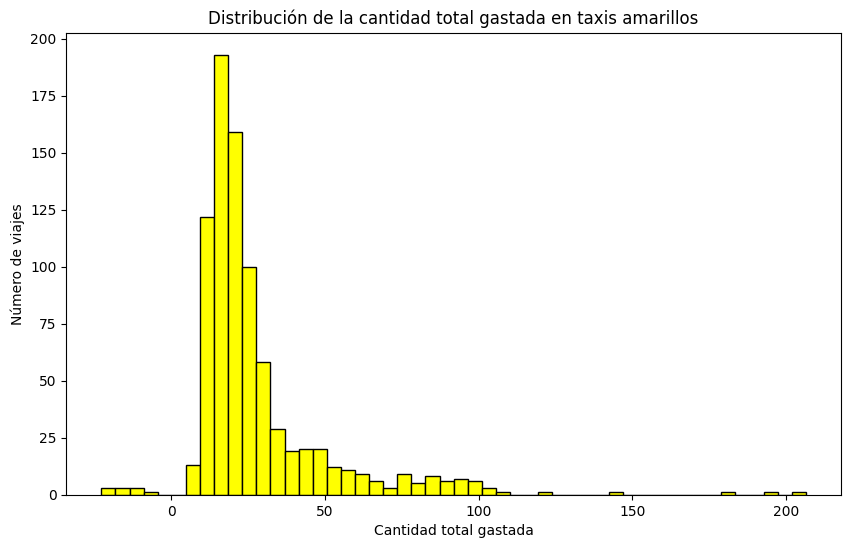

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(df['total_amount'], bins=50, color='yellow', edgecolor='black')
plt.title('Distribución de la cantidad total gastada en taxis amarillos')
plt.xlabel('Cantidad total gastada')
plt.ylabel('Número de viajes')
plt.show()

Voy hacer lectura el archivo de Taxis Verdes, para hacer correlacion y comparar con los Taxis Amarillos

In [47]:
df2=pd.read_csv('../csv/Taxis_Verdes_CO2_NY.csv',low_memory=False)
df2.head()

,trip_distance,CO2 Emissions,CO2,Smog,passenger_count,total_amount,parte_del_dia,dia,mes,viajes_todo_mes,Mes,Duracion,CO2_emissions_por_viaje
0,1.10,NaN,Rating,Rating,1.0,10.4,Noche,2023-09-01,2023-09,Noche,2023-09,0 days 00:05:35,NaN
1,1.80,167.0,6,7,1.0,19.1,Noche,2023-09-01,2023-09,Noche,2023-09,0 days 00:08:46,0.30060
2,10.52,172.0,6,7,2.0,61.0,Noche,2023-09-01,2023-09,Noche,2023-09,0 days 00:23:51,1.80944
3,4.72,181.0,6,6,1.0,35.8,Noche,2023-09-01,2023-09,Noche,2023-09,0 days 00:21:00,0.85432
4,5.95,263.0,4,5,1.0,26.5,Noche,2023-09-01,2023-09,Noche,2023-09,0 days 00:11:08,1.56485


In [48]:
def eliminar_nan_y_mostrar_forma(df2):
    # Eliminar filas con valores NaN
    df2 = df2.dropna()

    # Imprimir la forma del DataFrame
    print(df2.shape)

    return df2

df2 = eliminar_nan_y_mostrar_forma(df2)

(833, 13)


In [49]:
print(df2.isnull().sum()) # no hay valores nulos

trip_distance              0
CO2 Emissions              0
CO2                        0
Smog                       0
passenger_count            0
total_amount               0
parte_del_dia              0
dia                        0
mes                        0
viajes_todo_mes            0
Mes                        0
Duracion                   0
CO2_emissions_por_viaje    0
dtype: int64


In [50]:
print(df2.duplicated().sum())# no hay valores duplicados

0


In [51]:
print(df2.describe()) # describo el dataframe

       trip_distance  CO2 Emissions  passenger_count  total_amount  \
count     833.000000     833.000000       833.000000    833.000000   
mean        3.111717     257.471789         1.225690     24.786411   
std         3.598040      64.262847         0.771775     25.228818   
min         0.000000     104.000000         0.000000    -11.100000   
25%         1.040000     211.000000         1.000000     12.200000   
50%         1.890000     254.000000         1.000000     18.000000   
75%         3.830000     299.000000         1.000000     29.040000   
max        26.370000     608.000000         6.000000    407.940000   

       CO2_emissions_por_viaje  
count               833.000000  
mean                  0.798395  
std                   0.972218  
min                   0.000000  
25%                   0.247680  
50%                   0.457710  
75%                   0.948750  
max                   9.109760  


En este histograma que muestra la distribución de la cantidad total gastada en taxis verdes. El eje `x` representa la cantidad total gastada y el eje `y` representa el número de viajes.

Este gráfico es visualizar cuánto gasta la gente en promedio en los `taxis verdes` y comparar las tarifas con los `taxis amarillos`.

El análisis de este gráfico sugiere que la mayoría de los viajes cuestan entre 0 y 100, ya que es donde se ve la mayor aglomeración de barras. Esto indica que la mayoría de los viajes en taxi verde son relativamente cortos o baratos.

Las barras pequeñas y dispersas hasta el 400 indican que hay muy pocos viajes que cuestan tanto. Estos podrían ser viajes muy largos o viajes donde se aplicaron tarifas adicionales.

Las barras que sobrepasan los 250 y 200 en el eje y indican que hay un número significativo de viajes que cuestan una cantidad específica. Esto podría deberse a una tarifa plana común o a una distancia de viaje común.

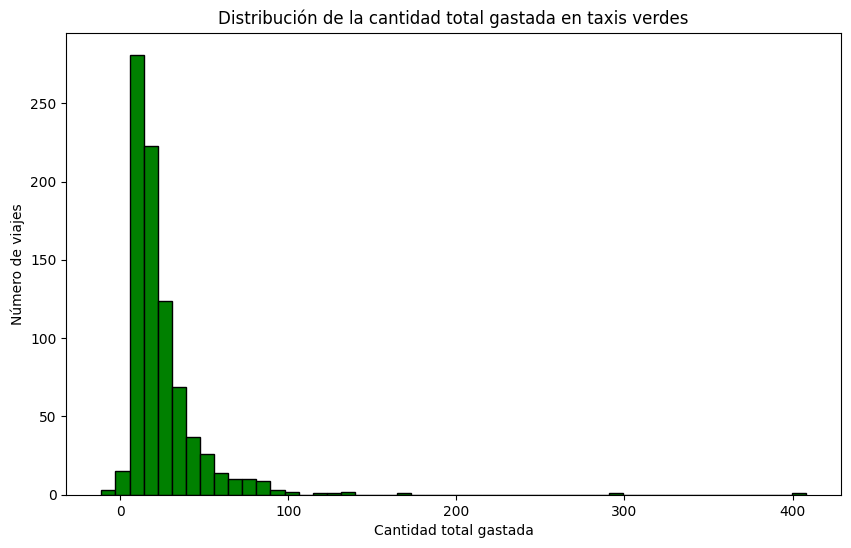

In [52]:
plt.figure(figsize=(10, 6))
plt.hist(df2['total_amount'], bins=50, color='green', edgecolor='black')
plt.title('Distribución de la cantidad total gastada en taxis verdes')
plt.xlabel('Cantidad total gastada')
plt.ylabel('Número de viajes')
plt.show()

_____________________________________________________________________________________________________

In [53]:
df3=pd.read_csv('../csv/taxi+_zone_lookup.csv',low_memory=False) # leo el csv
df3.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


Este código crea un nuevo DataFrame llamado df_taxisamarillos_co2 a partir de la combinación de columnas de dos DataFrames diferentes, df y df3. El objetivo aparente es seleccionar ciertas columnas específicas relacionadas con los viajes de taxis amarillos y la información geográfica asociada. <br>

El propósito de este código es para organizar y estructurar la información relevante de los viajes de taxis amarillos, incluyendo datos relacionados con las ganancias que se generan por ubicación geográfica.


In [54]:
df_taxisamarillos_co2 = pd.DataFrame({
    'trip_distance': df['trip_distance'],
    'passenger_count': df['passenger_count'],
    'total_amount': df['total_amount'],
    'parte_del_dia': df['parte_del_dia'],
    'Borough': df3['Borough'],
    'Zone': df3['Zone'],
    'service_zone': df3['service_zone'],
            
}) # Creo un nuevo dataframe con las columnas que necesito.

In [55]:
df_taxisamarillos_co2.dropna(inplace=True) # Elimino los valores nulos

In [56]:
df_taxisamarillos_co2.isnull().any() # Compruebo que no haya valores nulos

trip_distance      False
passenger_count    False
total_amount       False
parte_del_dia      False
Borough            False
Zone               False
service_zone       False
dtype: bool

_____________________________________________________________________________________________________

El código crea un nuevo DataFrame llamado df_taxisverdes_co2 a partir de la combinación de columnas de dos DataFrames diferentes, df2 y df3. El objetivo es seleccionar ciertas columnas específicas relacionadas con los viajes de taxis verdes y la información geográfica asociada.

In [57]:
df_taxisverdes_co2 = pd.DataFrame({
    'trip_distance': df2['trip_distance'],
    'passenger_count': df2['passenger_count'],
    'total_amount': df2['total_amount'],
    'parte_del_dia': df2['parte_del_dia'],
    'viajes_todo_mes': df2['viajes_todo_mes'],
    'Borough': df3['Borough'],
    'Zone': df3['Zone'],
    'service_zone': df3['service_zone'],
            
}) # Creo un nuevo dataframe con las columnas que necesito.

In [58]:
df_taxisverdes_co2.dropna(inplace=True) # Elimino los valores nulos

In [59]:
df_taxisverdes_co2.isnull().any() # Compruebo que no haya valores nulos

trip_distance      False
passenger_count    False
total_amount       False
parte_del_dia      False
viajes_todo_mes    False
Borough            False
Zone               False
service_zone       False
dtype: bool

El propósito de este código es agrupar los datos de los `Taxis Verdes` por zona y calcular la cantidad total gastada en cada zona. Luego, se visualizan los resultados utilizando un gráfico de barras para mostrar los ingresos de los `Taxis Verdes` por zona en la ciudad de Nueva York. Esto permite identificar las zonas que generan mayores ingresos y comparar la cantidad total gastada en cada una de ellas.

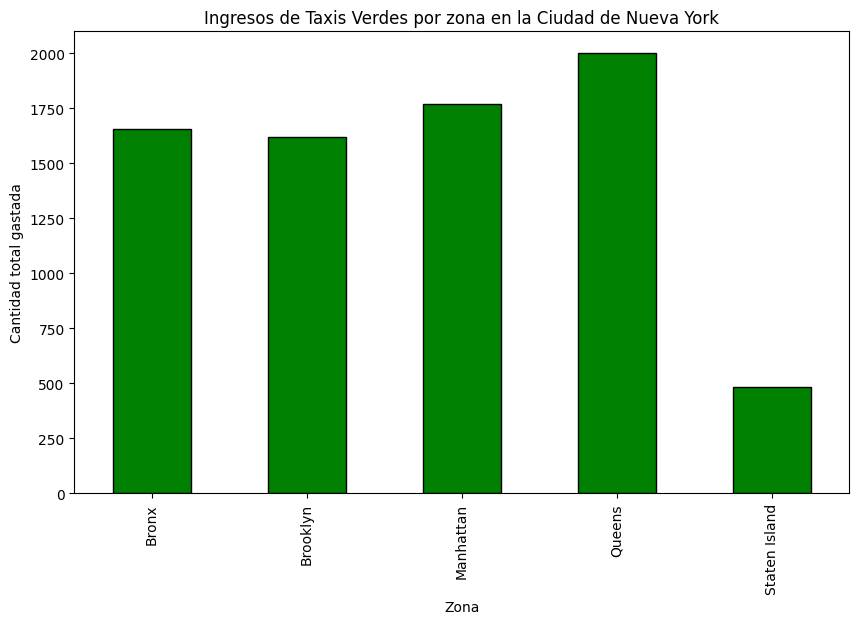

In [60]:
# Agrupar por zona y sumar la cantidad total gastada
zonas_comunes = df_taxisverdes_co2.groupby('Borough')['total_amount'].sum()

# Visualizar los resultados con un gráfico de barras
plt.figure(figsize=(10, 6))
zonas_comunes.plot(kind='bar', color='green', edgecolor='black')
plt.title('Ingresos de Taxis Verdes por zona en la Ciudad de Nueva York')
plt.xlabel('Zona')
plt.ylabel('Cantidad total gastada')
plt.show()



______________________________________________________________________________________________________
 Este otro gráfico de barras representa los ingresos totales de `Taxis Amarillos` en diferentes zonas de la ciudad de Nueva York. Cada barra en el gráfico corresponde a una zona, y la altura de la barra indica la cantidad total gastada en esa zona. 

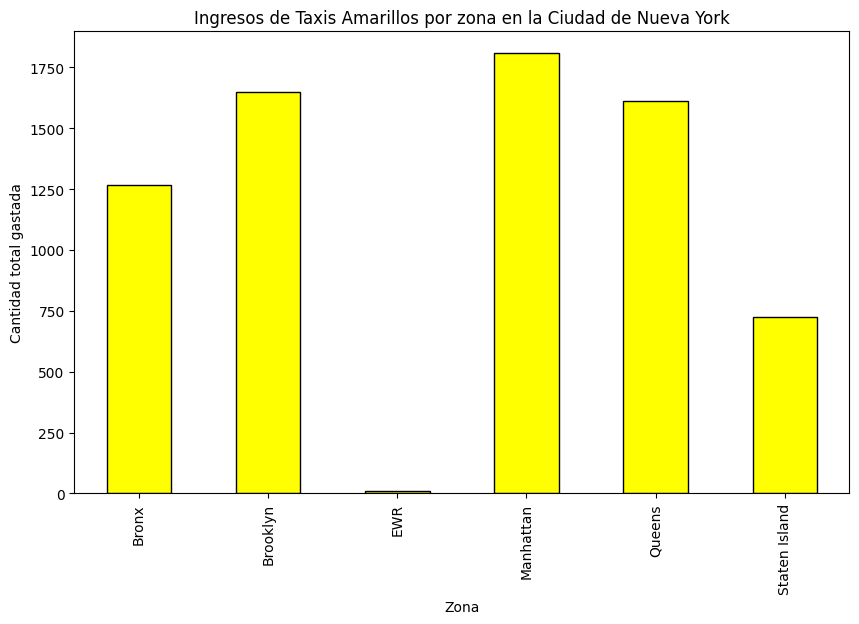

In [61]:
# Agrupar por zona y sumar la cantidad total gastada
zonas_comunes = df_taxisamarillos_co2.groupby('Borough')['total_amount'].sum()

# Visualizar los resultados con un gráfico de barras
plt.figure(figsize=(10, 6))
zonas_comunes.plot(kind='bar', color='yellow', edgecolor='black')
plt.title('Ingresos de Taxis Amarillos por zona en la Ciudad de Nueva York')
plt.xlabel('Zona')
plt.ylabel('Cantidad total gastada')
plt.show()


* `Conclusion`:

El análisis anterior esta mas dedicado a los ingresos generados por taxis verdes y amarillos en la Ciudad de Nueva York. El objetivo principal es proporcionar una comprensión visual y cuantitativa de la distribución de gastos, los ingresos por zona y la comparación total de ingresos entre ambos tipos de taxis.<br>

La comparación total de ingresos entre taxis verdes y amarillos destaca diferencias significativas, proporcionando información valiosa sobre el rendimiento financiero relativo de ambos servicios.<br>

Este Analsis puede ser útil para:
- Identificar áreas geográficas con mayor rentabilidad para cada tipo de taxi.
- Adaptar estrategias de precios y servicios según la demanda en distintas zonas.
- Optimizar la asignación de recursos y flotas en función de la rentabilidad por área.
